## ***SubgraphX***


> Moduled: Accpeting the four GNNs (GCN+GAP, DGCNN, DIFFPOOL, and GIN)


---

In [ ]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.2.1+cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-dj84rwx_
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-dj84rwx_
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit e213c297bb2aeb9ac50db258f5ab01ea11aea349
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math
from statistics import mean

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
import csv


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mutag_dataset = TUDataset(root='data/TUDataset', name='MUTAG')

In [ ]:
Explainability_name = 'GraphMask'
Task_name = 'Graph Classification'

checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True
DataSet_name = "MUTAG"

#File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [ ]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

mutag_train_dataset = []
mutag_test_dataset = []
for index in read_training_list_indexes:
    mutag_train_dataset.append(mutag_dataset[index])
for index in read_test_list_indexes:
    mutag_test_dataset.append(mutag_dataset[index])


print(f'Number of training graphs: {len(mutag_train_dataset)}')
print(f'Number of test graphs: {len(mutag_test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [ ]:
BATCH_SIZE = 64
mutag_train_dataloader = DataLoader(mutag_train_dataset, batch_size=BATCH_SIZE, shuffle=False)
mutag_test_dataloader = DataLoader(mutag_test_dataset, batch_size=1, shuffle=False)

In [ ]:
from torch_geometric.datasets import FakeDataset

num_graphs = 100
avg_num_nodes = 20
avg_degree = 15
node_feat_dim = 13
edge_feat_dim = 0
num_classes = 3

fake_dataset = FakeDataset(num_graphs=num_graphs, avg_num_nodes=avg_num_nodes, avg_degree=avg_degree, num_channels=node_feat_dim,
                           edge_dim=edge_feat_dim, num_classes=num_classes,)
Explainability_name = 'GraphMask'
Task_name = 'Graph Classification'
classifier_bias = True
DataSet_name = "Fake"
BATCH_SIZE = 10
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6

train_ratio = 0.8

fake_train_dataset = fake_dataset[:int(len(fake_dataset) * train_ratio)]
fake_test_dataset = fake_dataset[len(fake_dataset) - int(len(fake_dataset) * train_ratio):]

fake_train_dataloader = DataLoader(fake_train_dataset, batch_size=BATCH_SIZE, shuffle=False)
fake_test_dataloader = DataLoader(fake_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)

#import GCN_plus_GAP as Graph_Network
#GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=13, hidden_dim=13, output_dim=3,
#                                       num_hid_layers=3, Bias=classifier_bias, act_fun='ReLu', Weight_Initializer=1,
#                                       dropout_rate=classifier_dropout)

#import DGCNN as dgcnn_model
#GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 13], num_classes=3, node_feat_size=13, mlp_act_fun='ReLu',
#                                    dgcnn_act_fun='tanh', mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=17,
#                                    hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])

#import DIFFPOOL as diffpool_model
#GNN_Model = diffpool_model.DIFFPOOL_Model(embedding_input_dim=13, num_classes=3, embedding_num_block_layers=1, embedding_hid_dim=64,
#                                          new_feature_size=64, assignment_input_dim=13, assignment_num_block_layers=1,
#                                          assignment_hid_dim=64, max_number_of_nodes=256, prediction_hid_layers=[50],
#                                          concat_neighborhood=False, Weight_Initializer=1, Bias=classifier_bias, dropout_rate=0,
#                                          normalize_graphsage=False, aggregation="mean", act_fun="ReLu", num_pooling=1,
#                                          concat_diffpools_outputs=True, pooling="mean")


import GIN as gin_model
GNN_Model = gin_model.GIN_Model(mlp_output_dim=2, mlp_input_dim=13, mlp_hid_dim=13, num_mlp_layers=4,
                                Bias=classifier_bias, mlp_act_fun="ReLu", dropout_rate=classifier_dropout, num_slp_layers=2,
                                Weight_Initializer=1, joint_embeddings=False)


Model_name = GNN_Model.__class__.__name__
print("Model_name: ", Model_name)
File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

Model_name:  GIN_Model


In [ ]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [ ]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    #plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [ ]:
def train_step(data):
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in data:
        if GNN_Model.__class__.__name__ == "GCN_plus_GAP":
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
            batch_loss = loss_calculations(soft, batch_of_graphs.y)
            Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())

        elif GNN_Model.__class__.__name__ == "DGCNN_Model":
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
            batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
            Pred_Labels.extend(softmaxed_h2.argmax(dim=1).detach().tolist())

        elif GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
            concatination_list_of_poolings, prediction_output_without_soft, prediction_output = GNN_Model(batch_of_graphs, None)
            Pred_Labels.extend(prediction_output.argmax(dim=1).detach().tolist())
            batch_loss = loss_calculations(prediction_output, batch_of_graphs.y)

        elif GNN_Model.__class__.__name__ == "GIN_Model":
            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, lin2_output_softmaxed = GNN_Model(batch_of_graphs, None)
            batch_loss = loss_calculations(lin2_output_softmaxed, batch_of_graphs.y)
            Pred_Labels.extend(lin2_output_softmaxed.argmax(dim=1).detach().tolist())
        else:
            raise Exception("We cover GCN_plus_GAP, DGCNN, DIFFPOOL, and GIN.")

        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [ ]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index, data):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step(data)
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        #if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
        #  torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 1.2916
Epoch: 002, Model Loss: 1.2327
Epoch: 003, Model Loss: 1.0566
Epoch: 004, Model Loss: 1.0704
Epoch: 005, Model Loss: 1.0535
Epoch: 006, Model Loss: 0.9911
Epoch: 007, Model Loss: 0.9934
Epoch: 008, Model Loss: 0.9817
Epoch: 009, Model Loss: 0.9876
Epoch: 010, Model Loss: 0.9187
Epoch: 011, Model Loss: 0.8771
Epoch: 012, Model Loss: 0.9347
Epoch: 013, Model Loss: 0.8917
Epoch: 014, Model Loss: 0.8397
Epoch: 015, Model Loss: 0.8426
Epoch: 016, Model Loss: 0.8516
Epoch: 017, Model Loss: 0.8434
Epoch: 018, Model Loss: 0.8679
Epoch: 019, Model Loss: 0.8354
Epoch: 020, Model Loss: 0.8237
Epoch: 021, Model Loss: 0.7892
Epoch: 022, Model Loss: 0.7901
Epoch: 023, Model Loss: 0.7496
Epoch: 024, Model Loss: 0.7780
Epoch: 025, Model Loss: 0.7746
Epoch: 026, Model Loss: 0.7686
Epoch: 027, Model Loss: 0.7510
Epoch: 028, Model Loss: 0.8200
Epoch: 029, Model Loss: 0.7793
Epoch: 030, Model Loss: 0.8137
Epoch: 031, Model Loss: 0.7826
Epoch: 032, Model Loss: 0.7639
Epoch: 0

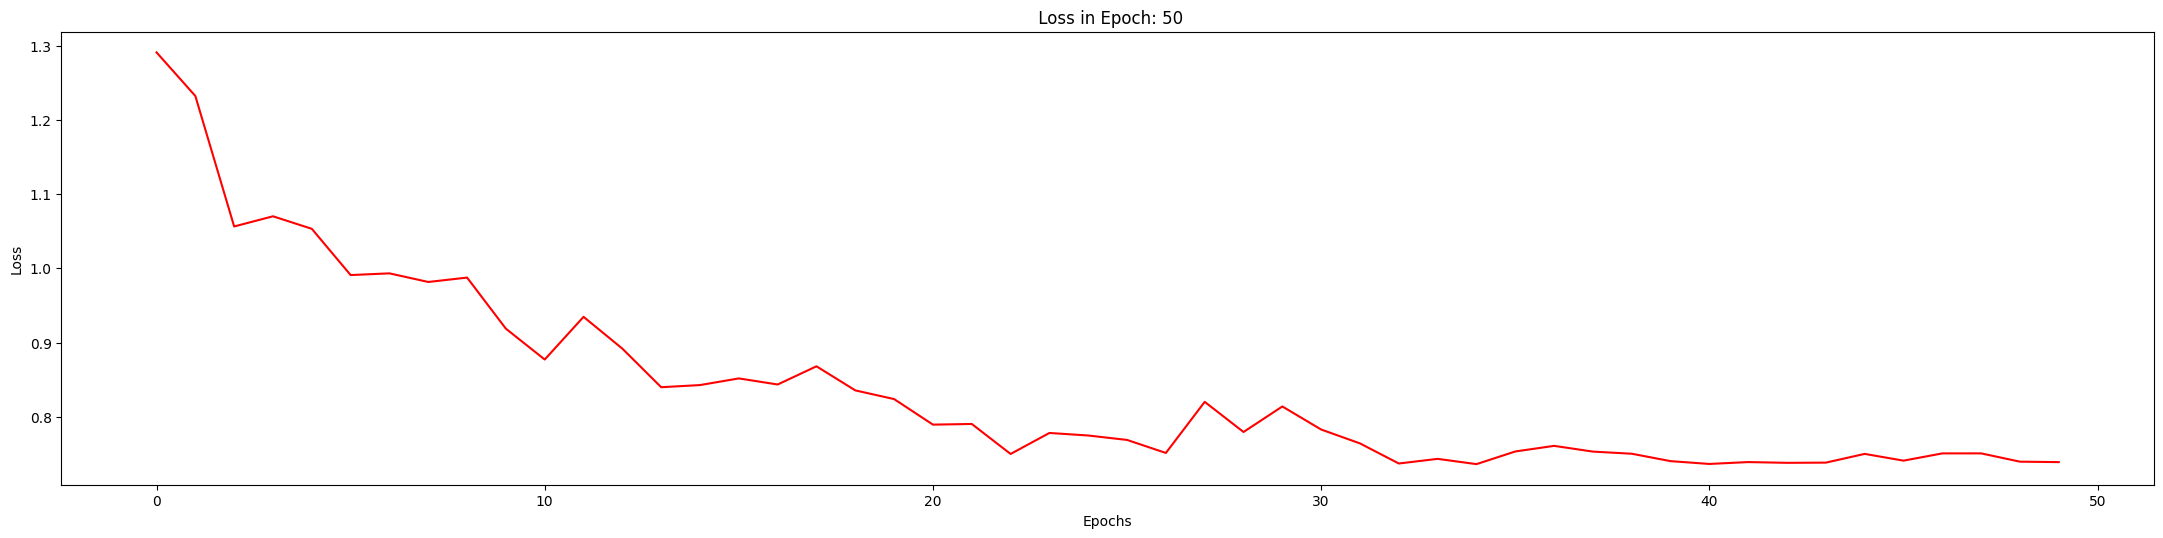

Epoch: 051, Model Loss: 0.7379
Epoch: 052, Model Loss: 0.7433
Epoch: 053, Model Loss: 0.7635
Epoch: 054, Model Loss: 0.7709
Epoch: 055, Model Loss: 0.7909
Epoch: 056, Model Loss: 0.7646
Epoch: 057, Model Loss: 0.7652
Epoch: 058, Model Loss: 0.7690
Epoch: 059, Model Loss: 0.7638
Epoch: 060, Model Loss: 0.7656
Epoch: 061, Model Loss: 0.7641
Epoch: 062, Model Loss: 0.7386
Epoch: 063, Model Loss: 0.7527
Epoch: 064, Model Loss: 0.7457
Epoch: 065, Model Loss: 0.7336
Epoch: 066, Model Loss: 0.7262
Epoch: 067, Model Loss: 0.7390
Epoch: 068, Model Loss: 0.7298
Epoch: 069, Model Loss: 0.7260
Epoch: 070, Model Loss: 0.7367
Epoch: 071, Model Loss: 0.7349
Epoch: 072, Model Loss: 0.7254
Epoch: 073, Model Loss: 0.7263
Epoch: 074, Model Loss: 0.7337
Epoch: 075, Model Loss: 0.7217
Epoch: 076, Model Loss: 0.7166
Epoch: 077, Model Loss: 0.7592
Epoch: 078, Model Loss: 0.7735
Epoch: 079, Model Loss: 0.7477
Epoch: 080, Model Loss: 0.7385
Epoch: 081, Model Loss: 0.7379
Epoch: 082, Model Loss: 0.7330
Epoch: 0

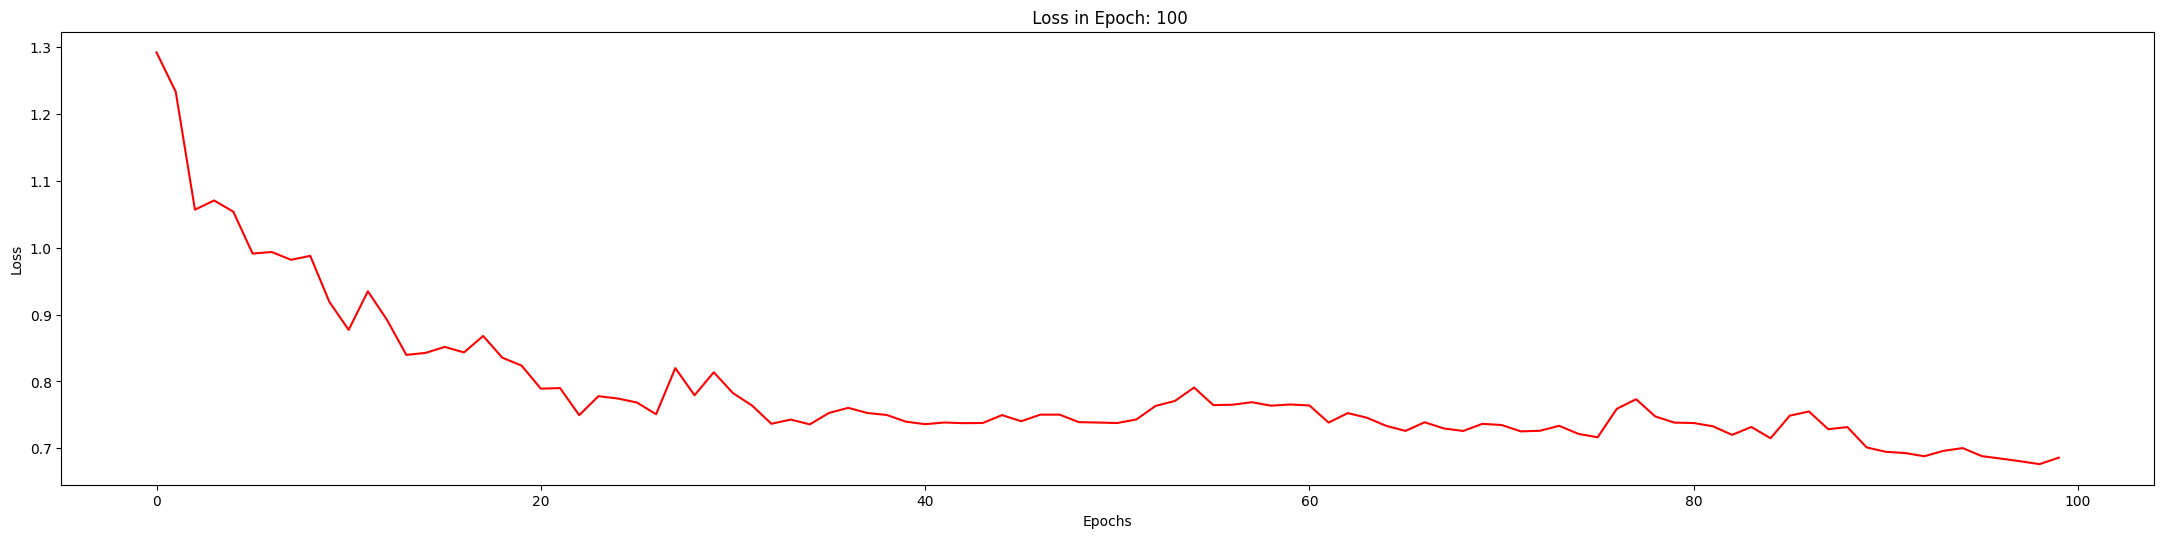

Epoch: 101, Model Loss: 0.6768
Epoch: 102, Model Loss: 0.6764
Epoch: 103, Model Loss: 0.6756
Epoch: 104, Model Loss: 0.6776
Epoch: 105, Model Loss: 0.6760
Epoch: 106, Model Loss: 0.6837
Epoch: 107, Model Loss: 0.6763
Epoch: 108, Model Loss: 0.6753
Epoch: 109, Model Loss: 0.6820
Epoch: 110, Model Loss: 0.6762
Epoch: 111, Model Loss: 0.6829
Epoch: 112, Model Loss: 0.6807
Epoch: 113, Model Loss: 0.6779
Epoch: 114, Model Loss: 0.6756
Epoch: 115, Model Loss: 0.6826
Epoch: 116, Model Loss: 0.6747
Epoch: 117, Model Loss: 0.6766
Epoch: 118, Model Loss: 0.6826
Epoch: 119, Model Loss: 0.6757
Epoch: 120, Model Loss: 0.6798
Epoch: 121, Model Loss: 0.6771
Epoch: 122, Model Loss: 0.6771
Epoch: 123, Model Loss: 0.6949
Epoch: 124, Model Loss: 0.6767
Epoch: 125, Model Loss: 0.6756
Epoch: 126, Model Loss: 0.6786
Epoch: 127, Model Loss: 0.6771
Epoch: 128, Model Loss: 0.6756
Epoch: 129, Model Loss: 0.6767
Epoch: 130, Model Loss: 0.6754
Epoch: 131, Model Loss: 0.6767
Epoch: 132, Model Loss: 0.6754
Epoch: 1

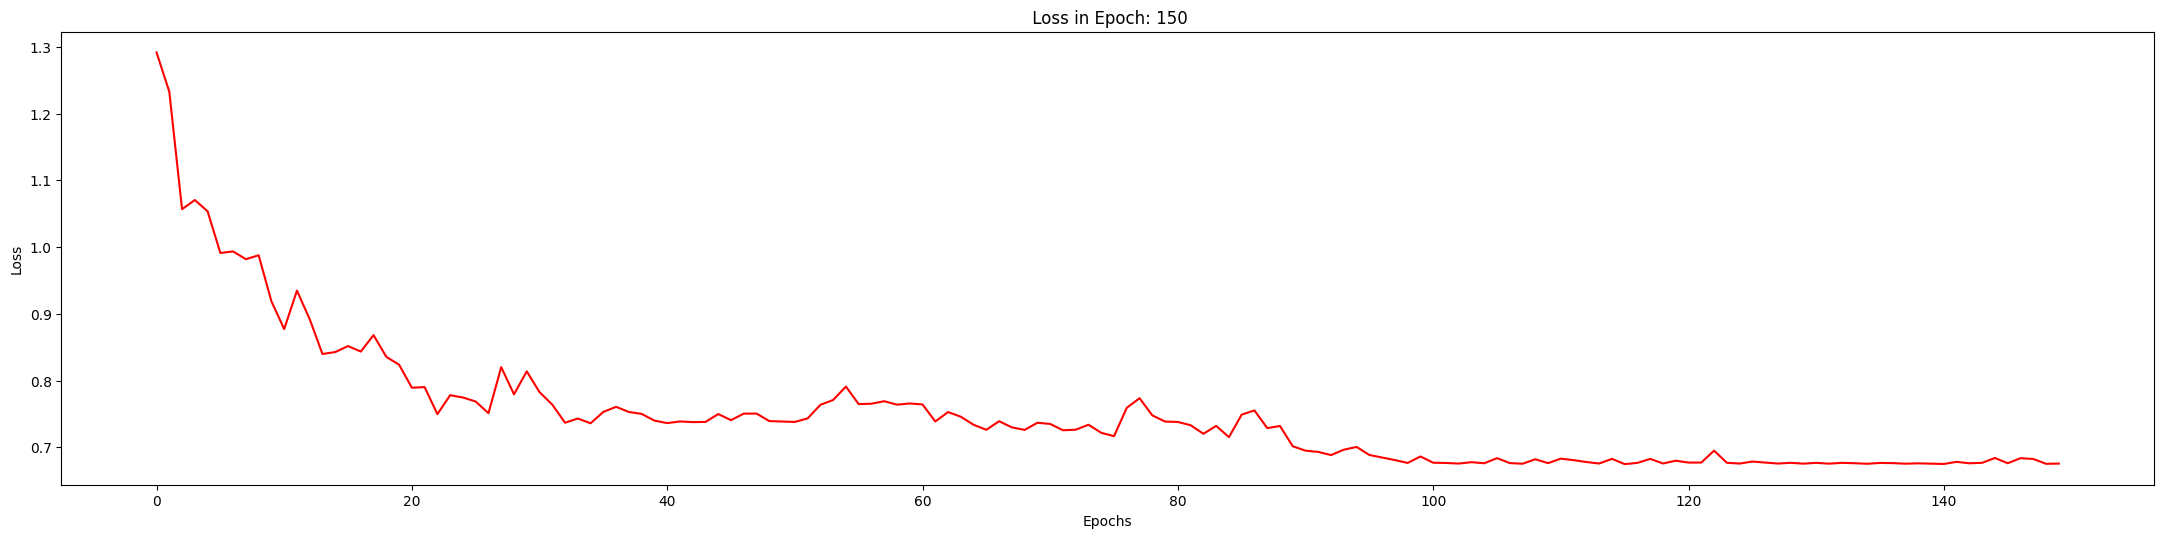

Epoch: 151, Model Loss: 0.6787
Epoch: 152, Model Loss: 0.6745
Epoch: 153, Model Loss: 0.6743
Epoch: 154, Model Loss: 0.6748
Epoch: 155, Model Loss: 0.6768
Epoch: 156, Model Loss: 0.6750
Epoch: 157, Model Loss: 0.6745
Epoch: 158, Model Loss: 0.6748
Epoch: 159, Model Loss: 0.6765
Epoch: 160, Model Loss: 0.6763
Epoch: 161, Model Loss: 0.6764
Epoch: 162, Model Loss: 0.6767
Epoch: 163, Model Loss: 0.6767
Epoch: 164, Model Loss: 0.6766
Epoch: 165, Model Loss: 0.6759
Epoch: 166, Model Loss: 0.6751
Epoch: 167, Model Loss: 0.6756
Epoch: 168, Model Loss: 0.6756
Epoch: 169, Model Loss: 0.6763
Epoch: 170, Model Loss: 0.6760
Epoch: 171, Model Loss: 0.6738
Epoch: 172, Model Loss: 0.6750
Epoch: 173, Model Loss: 0.6753
Epoch: 174, Model Loss: 0.6760
Epoch: 175, Model Loss: 0.6752
Epoch: 176, Model Loss: 0.6765
Epoch: 177, Model Loss: 0.6762
Epoch: 178, Model Loss: 0.6747
Epoch: 179, Model Loss: 0.6754
Epoch: 180, Model Loss: 0.6798
Epoch: 181, Model Loss: 0.6758
Epoch: 182, Model Loss: 0.6753
Epoch: 1

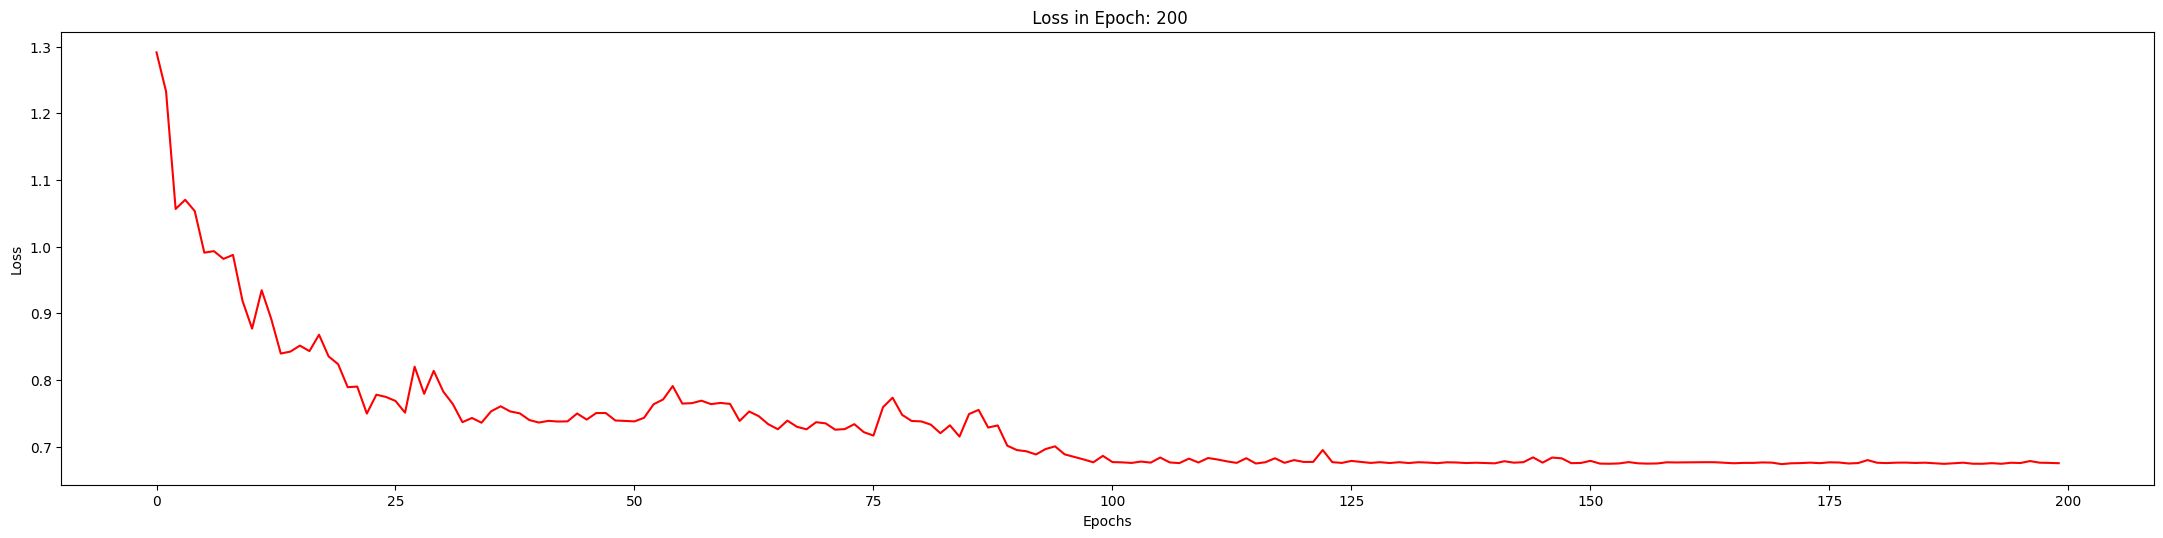

Epoch: 201, Model Loss: 0.6747
Epoch: 202, Model Loss: 0.6763
Epoch: 203, Model Loss: 0.6764
Epoch: 204, Model Loss: 0.6756
Epoch: 205, Model Loss: 0.6761
Epoch: 206, Model Loss: 0.6762
Epoch: 207, Model Loss: 0.6765
Epoch: 208, Model Loss: 0.6764
Epoch: 209, Model Loss: 0.6758
Epoch: 210, Model Loss: 0.6753
Epoch: 211, Model Loss: 0.6764
Epoch: 212, Model Loss: 0.6763
Epoch: 213, Model Loss: 0.6764
Epoch: 214, Model Loss: 0.6767
Epoch: 215, Model Loss: 0.6757
Epoch: 216, Model Loss: 0.6753
Epoch: 217, Model Loss: 0.6758
Epoch: 218, Model Loss: 0.6759
Epoch: 219, Model Loss: 0.6765
Epoch: 220, Model Loss: 0.6732
Epoch: 221, Model Loss: 0.6747
Epoch: 222, Model Loss: 0.6761
Epoch: 223, Model Loss: 0.6734
Epoch: 224, Model Loss: 0.6751
Epoch: 225, Model Loss: 0.6749
Epoch: 226, Model Loss: 0.6746
Epoch: 227, Model Loss: 0.6752
Epoch: 228, Model Loss: 0.6742
Epoch: 229, Model Loss: 0.6755
Epoch: 230, Model Loss: 0.6764
Epoch: 231, Model Loss: 0.6753
Epoch: 232, Model Loss: 0.6766
Epoch: 2

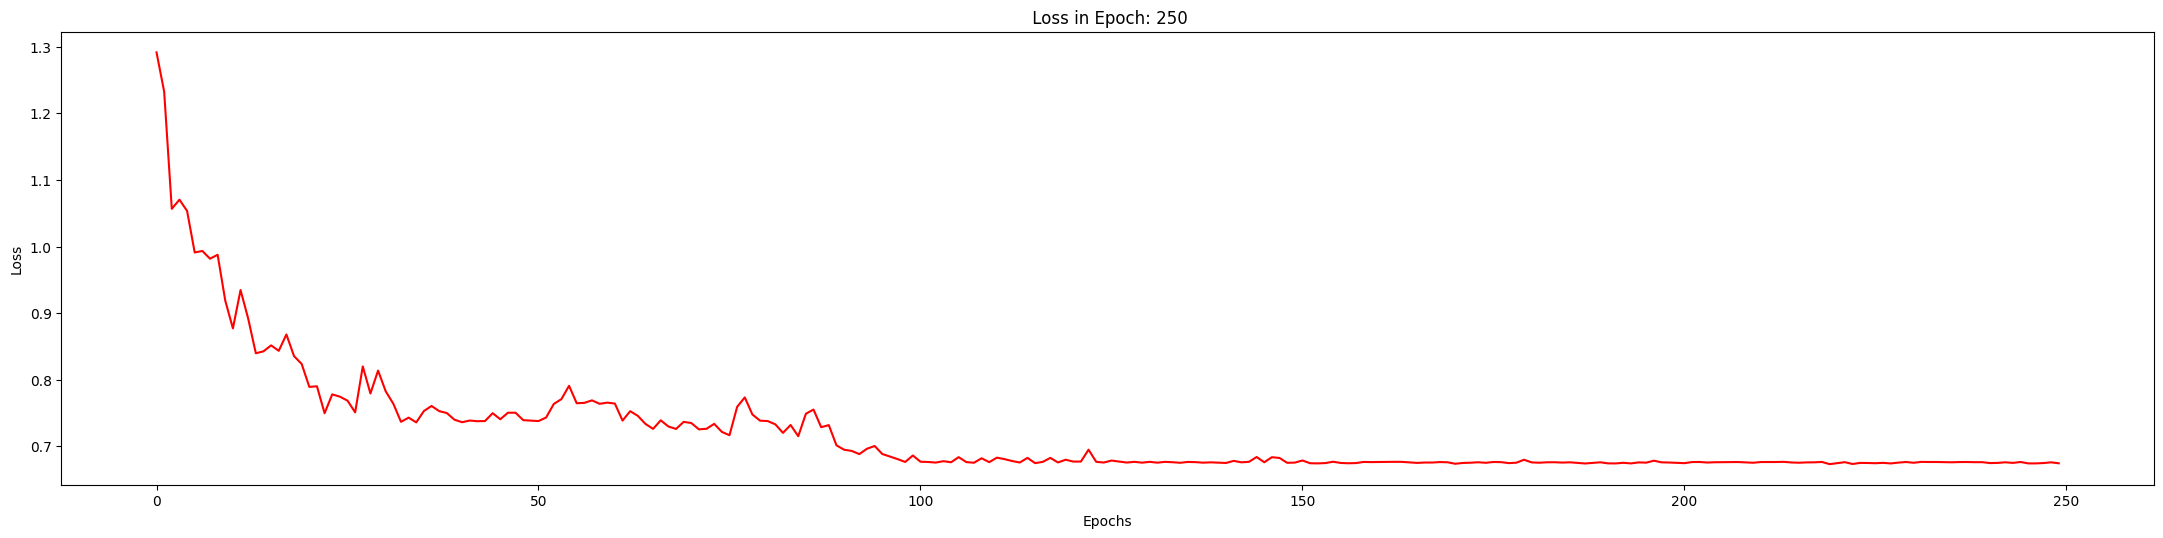

Epoch: 251, Model Loss: 0.6753
Epoch: 252, Model Loss: 0.6742
Epoch: 253, Model Loss: 0.6743
Epoch: 254, Model Loss: 0.6743
Epoch: 255, Model Loss: 0.6744
Epoch: 256, Model Loss: 0.6760
Epoch: 257, Model Loss: 0.6742
Epoch: 258, Model Loss: 0.6749
Epoch: 259, Model Loss: 0.6745
Epoch: 260, Model Loss: 0.6744
Epoch: 261, Model Loss: 0.6764
Epoch: 262, Model Loss: 0.6739
Epoch: 263, Model Loss: 0.6752
Epoch: 264, Model Loss: 0.6755
Epoch: 265, Model Loss: 0.6757
Epoch: 266, Model Loss: 0.6755
Epoch: 267, Model Loss: 0.6751
Epoch: 268, Model Loss: 0.6758
Epoch: 269, Model Loss: 0.6756
Epoch: 270, Model Loss: 0.6759
Epoch: 271, Model Loss: 0.6763
Epoch: 272, Model Loss: 0.6747
Epoch: 273, Model Loss: 0.6744
Epoch: 274, Model Loss: 0.6747
Epoch: 275, Model Loss: 0.6751
Epoch: 276, Model Loss: 0.6736
Epoch: 277, Model Loss: 0.6737
Epoch: 278, Model Loss: 0.6731
Epoch: 279, Model Loss: 0.6738
Epoch: 280, Model Loss: 0.6741
Epoch: 281, Model Loss: 0.6750
Epoch: 282, Model Loss: 0.6738
Epoch: 2

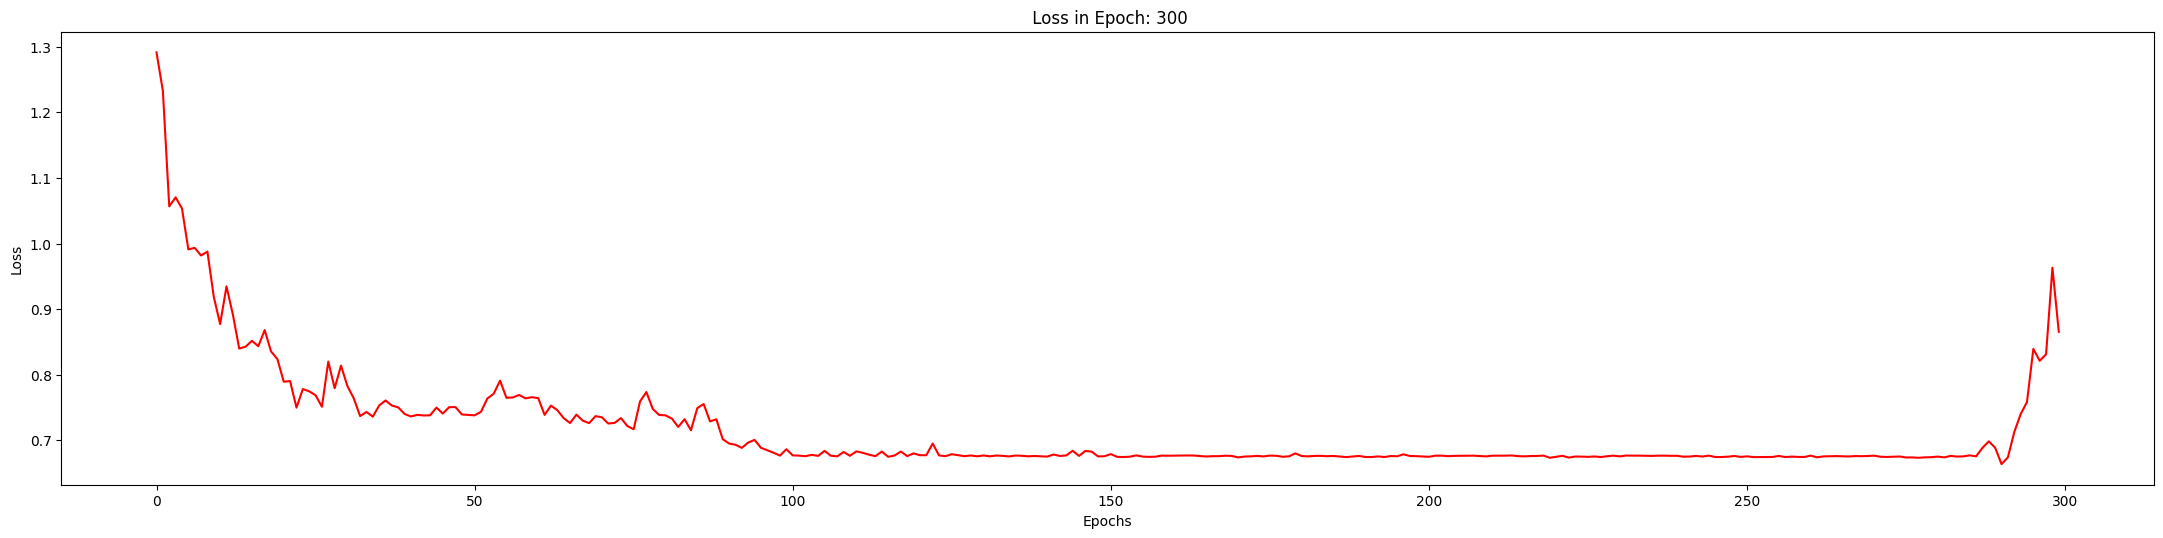

In [ ]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index, fake_train_dataloader)

In [ ]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0

    for batch_of_graphs in test_loader:
        if GNN_Model.__class__.__name__ == "GCN_plus_GAP":
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
            GNN_Model_test_pred = soft.argmax(dim=1)
        elif GNN_Model.__class__.__name__ == "DGCNN_Model":
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft = GNN_Model(batch_of_graphs, None)
            GNN_Model_test_pred = soft.argmax(dim=1)
        elif GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
            concatination_list_of_poolings, prediction_output_without_soft, soft = GNN_Model(batch_of_graphs, None)
            GNN_Model_test_pred = soft.argmax(dim=1)
        elif GNN_Model.__class__.__name__ == "GIN_Model":
            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, soft = GNN_Model(batch_of_graphs, None)
            GNN_Model_test_pred = soft.argmax(dim=1)

        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred.tolist()[0])
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [ ]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(fake_test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.5125


In [ ]:
class MarginalSubgraphDataset(object):
    def __init__(self, data, exclude_mask, include_mask):

        self.num_nodes = data.num_nodes
        self.X = data.x
        self.edge_index = data.edge_index
        self.label = data.y

        self.exclude_mask = torch.tensor(exclude_mask).type(torch.float32)
        self.include_mask = torch.tensor(include_mask).type(torch.float32)

    def __len__(self):
        return self.exclude_mask.shape[0]

    def agraph_build_zero_filling(self, X, edge_index, node_mask):
        ret_X = X * node_mask.unsqueeze(1)
        return ret_X, edge_index

    def __getitem__(self, idx):
        exclude_graph_X, exclude_graph_edge_index = self.agraph_build_zero_filling(self.X, self.edge_index, self.exclude_mask[idx])
        include_graph_X, include_graph_edge_index = self.agraph_build_zero_filling(self.X, self.edge_index, self.include_mask[idx])

        exclude_data = Data(x=exclude_graph_X, edge_index=exclude_graph_edge_index)
        include_data = Data(x=include_graph_X, edge_index=include_graph_edge_index)
        return exclude_data, include_data

In [ ]:
class MCTS_Node_Attributes(object):
    def __init__(self, coalition, data, ori_graph, ubc1_c_coef, W, N, P, load_dict):
        self.data = data
        self.coalition = coalition
        self.ori_graph = ori_graph

        self.ubc1_c_coef = ubc1_c_coef
        self.children = []
        self.W = W  # sum of node value
        self.N = N  # times of arrival
        self.P = P  # property score (reward)
        if load_dict is not None:
            self.load_info(load_dict)

    def Q(self):
        return self.W / self.N if self.N > 0 else 0

    def U(self, n):
        return self.ubc1_c_coef * self.P * math.sqrt(n) / (1 + self.N)

    @property
    def info(self):
        info_dict = {
            'data': self.data.to('cpu'),
            'coalition': self.coalition,
            'ori_graph': self.ori_graph,
            'W': self.W,
            'N': self.N,
            'P': self.P
        }
        return info_dict

    def load_info(self, info_dict):
        self.W = info_dict['W']
        self.N = info_dict['N']
        self.P = info_dict['P']
        self.coalition = info_dict['coalition']
        self.ori_graph = info_dict['ori_graph']
        self.data = info_dict['data']
        self.children = []
        return self

In [ ]:
class Mone_Carlo_Tree_Search(object):

    def __init__(self, X, edge_index, num_hops, n_rollout, min_children_threshold, ubc1_c_coef, expand_count_threshold, high2low, score_func):

        self.X = X
        self.edge_index = edge_index

        self.num_hops = num_hops
        self.data = Data(x=self.X, edge_index=self.edge_index)
        graph_data = Data(x=self.X, edge_index=remove_self_loops(self.edge_index)[0])
        self.graph = to_networkx(graph_data, to_undirected=True)
        self.data = Batch.from_data_list([self.data])
        self.num_nodes = self.graph.number_of_nodes()
        self.score_func = score_func
        self.n_rollout = n_rollout
        self.min_children_threshold = min_children_threshold
        self.ubc1_c_coef = ubc1_c_coef
        self.expand_count_threshold = expand_count_threshold
        self.high2low = high2low
        self.new_node_idx = None

        self.root_coalition = sorted([node for node in range(self.num_nodes)])
        self.MCTSNodeClass = partial(MCTS_Node_Attributes, data=self.data, ori_graph=self.graph, ubc1_c_coef=self.ubc1_c_coef, W=0, N=0, P=0, load_dict=None)
        self.root = self.MCTSNodeClass(self.root_coalition)
        self.state_map = {str(self.root.coalition): self.root}

    def set_score_func(self, score_func):
        self.score_func = score_func

    def k_hop_subgraph_with_default_whole_graph(self, edge_index, node_idx, num_hops, relabel_nodes, num_nodes, flow):

        num_nodes = maybe_num_nodes(edge_index, num_nodes)

        assert flow in ['source_to_target', 'target_to_source']
        if flow == 'target_to_source':
            row, col = edge_index
        else:
            col, row = edge_index  # edge_index 0 to 1, col: source, row: target

        node_mask = row.new_empty(num_nodes, dtype=torch.bool)
        edge_mask = row.new_empty(row.size(0), dtype=torch.bool)

        inv = None

        if node_idx is None:
            subsets = torch.tensor([0])
            cur_subsets = subsets
            while 1:
                node_mask.fill_(False)
                node_mask[subsets] = True
                torch.index_select(node_mask, 0, row, out=edge_mask)
                subsets = torch.cat([subsets, col[edge_mask]]).unique()
                if not cur_subsets.equal(subsets):
                    cur_subsets = subsets
                else:
                    subset = subsets
                    break
        else:
            if isinstance(node_idx, (int, list, tuple)):
                node_idx = torch.tensor([node_idx], device=row.device, dtype=torch.int64).flatten()
            elif isinstance(node_idx, torch.Tensor) and len(node_idx.shape) == 0:
                node_idx = torch.tensor([node_idx])
            else:
                node_idx = node_idx.to(row.device)

            subsets = [node_idx]
            for _ in range(num_hops):
                node_mask.fill_(False)
                node_mask[subsets[-1]] = True
                torch.index_select(node_mask, 0, row, out=edge_mask)
                subsets.append(col[edge_mask])
            subset, inv = torch.cat(subsets).unique(return_inverse=True)
            inv = inv[:node_idx.numel()]

        node_mask.fill_(False)
        node_mask[subset] = True
        edge_mask = node_mask[row] & node_mask[col]

        edge_index = edge_index[:, edge_mask]

        if relabel_nodes:
            node_idx = row.new_full((num_nodes,), -1)
            node_idx[subset] = torch.arange(subset.size(0), device=row.device)
            edge_index = node_idx[edge_index]

        return subset, edge_index, inv, edge_mask

    def compute_scores(self, score_func, children):
        results = []
        for child in children:
            if child.P == 0:
                score = score_func(child.coalition, child.data)
            else:
                score = child.P
            results.append(score)
        return results

    def mcts_rollout(self, tree_node):
        cur_graph_coalition = tree_node.coalition

        if len(cur_graph_coalition) <= self.min_children_threshold:    #            it's considered as a leaf
            return tree_node.P


        if len(tree_node.children) == 0:
            node_degree_list = list(self.graph.subgraph(cur_graph_coalition).degree)
            node_degree_list = sorted(node_degree_list, key=lambda x: x[1], reverse=self.high2low)
            all_nodes = [x[0] for x in node_degree_list]

            if self.new_node_idx:
                expand_nodes = [node for node in all_nodes if node != self.new_node_idx]
            else:
                expand_nodes = all_nodes

            if len(all_nodes) > self.expand_count_threshold:
                expand_nodes = expand_nodes[:self.expand_count_threshold]


            for each_node in expand_nodes:
                subgraph_coalition = [node for node in all_nodes if node != each_node]

                subgraphs = [self.graph.subgraph(c) for c in nx.connected_components(self.graph.subgraph(subgraph_coalition))]

                if self.new_node_idx:
                    for sub in subgraphs:
                        if self.new_node_idx in list(sub.nodes()):
                            main_sub = sub
                else:
                    main_sub = subgraphs[0]

                    for sub in subgraphs:
                        if sub.number_of_nodes() > main_sub.number_of_nodes():
                            main_sub = sub

                new_graph_coalition = sorted(list(main_sub.nodes()))


                find_same = False
                for old_graph_node in self.state_map.values():
                    if Counter(old_graph_node.coalition) == Counter(new_graph_coalition):
                        new_node = old_graph_node
                        find_same = True

                if not find_same:
                    new_node = self.MCTSNodeClass(new_graph_coalition)
                    self.state_map[str(new_graph_coalition)] = new_node

                find_same_child = False
                for cur_child in tree_node.children:
                    if Counter(cur_child.coalition) == Counter(new_graph_coalition):
                        find_same_child = True

                if not find_same_child:
                    tree_node.children.append(new_node)

            scores = self.compute_scores(self.score_func, tree_node.children)
            for child, score in zip(tree_node.children, scores):
                child.P = score

        sum_count = sum([c.N for c in tree_node.children])
        selected_node = max(tree_node.children, key=lambda x: x.Q() + x.U(sum_count))
        v = self.mcts_rollout(selected_node)
        selected_node.W += v
        selected_node.N += 1
        return v

    def mcts(self):
        print(f"The number of nodes in the graph is {self.graph.number_of_nodes()}")
        for rollout_idx in range(self.n_rollout):
            self.mcts_rollout(self.root)
            print(f"At the {rollout_idx} rollout, {len(self.state_map)} states that have been explored.")

        explanations = [node for _, node in self.state_map.items()]
        explanations = sorted(explanations, key=lambda x: x.P, reverse=True)
        return explanations

In [ ]:
class SubGraphX(object):
    def __init__(self, GNN_Model, num_classes, num_hops, explain_graph, rollout_count, min_children_threshold, ubc1_c_coef,
                 expand_count_threshold, high2low, sample_num, save_permission_explanations):
        self.Model_Name = GNN_Model.__class__.__name__
        self.GNN_Model = GNN_Model
        self.GNN_Model.eval()

        self.num_classes = num_classes
        self.num_hops = self.update_num_hops(num_hops)
        self.explain_graph = explain_graph
        self.save_permission_explanations = save_permission_explanations

        # mcts hyper-parameters
        self.rollout_count = rollout_count
        self.min_children_threshold = min_children_threshold
        self.ubc1_c_coef = ubc1_c_coef
        self.expand_count_threshold = expand_count_threshold
        self.high2low = high2low

        # reward function hyper-parameters
        self.sample_num = sample_num
        self.reward_method = "mc_shapley"
        self.subgraph_building_method = "zero_filling"




    def update_num_hops(self, num_hops):
        if num_hops is not None:
            return num_hops
        k = 0
        for module in self.GNN_Model.modules():
            if isinstance(module, MessagePassing):
                k += 1
        return k

    def graph_build_zero_filling(self, X, edge_index, node_mask):
        ret_X = X * node_mask.unsqueeze(1)
        return ret_X, edge_index

    def get_graph_build_func(self, build_method):
        if build_method == 'zero_filling':
            return self.graph_build_zero_filling
        else:
            print("fail")
    def marginal_contribution(self, data, exclude_mask, include_mask, value_func, subgraph_build_func):
        marginal_subgraph_dataset = MarginalSubgraphDataset(data, exclude_mask, include_mask)

        dataloader = DataLoader(marginal_subgraph_dataset, batch_size=256, shuffle=False, num_workers=0)
        marginal_contribution_list = []

        if self.GNN_Model.__class__.__name__ == "GCN_plus_GAP":
            for exclude_data, include_data in dataloader:
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, exclude_values = value_func(exclude_data)
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, include_values = value_func(include_data)
                margin_values = include_values - exclude_values
                marginal_contribution_list.append(margin_values)

        elif self.GNN_Model.__class__.__name__ == "DGCNN_Model":
            for exclude_data, include_data in dataloader:
                final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, exclude_values = value_func(exclude_data)
                final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, include_values = value_func(include_data)
                margin_values = include_values - exclude_values
                marginal_contribution_list.append(margin_values)

        elif self.GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
            for exclude_data, include_data in dataloader:
                concatination_list_of_poolings, prediction_output_without_soft, exclude_values = value_func(exclude_data)
                concatination_list_of_poolings, prediction_output_without_soft, include_values = value_func(include_data)
                margin_values = include_values - exclude_values
                marginal_contribution_list.append(margin_values)

        elif self.GNN_Model.__class__.__name__ == "GIN_Model":
            for exclude_data, include_data in dataloader:
                mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, exclude_values = value_func(exclude_data)
                mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, include_values = value_func(include_data)
                margin_values = include_values - exclude_values
                marginal_contribution_list.append(margin_values)

        marginal_contributions = torch.cat(marginal_contribution_list, dim=0)
        return marginal_contributions

    def mc_shapley(self, coalition, data, value_func, subgraph_building_method, sample_num):

        subset_build_func = self.get_graph_build_func(subgraph_building_method)

        num_nodes = data.num_nodes
        node_indices = np.arange(num_nodes)
        coalition_placeholder = num_nodes
        set_exclude_masks = []
        set_include_masks = []

        for example_idx in range(sample_num):
            subset_nodes_from = [node for node in node_indices if node not in coalition]
            random_nodes_permutation = np.array(subset_nodes_from + [coalition_placeholder])
            random_nodes_permutation = np.random.permutation(random_nodes_permutation)
            split_idx = np.where(random_nodes_permutation == coalition_placeholder)[0][0]
            selected_nodes = random_nodes_permutation[:split_idx]
            set_exclude_mask = np.zeros(num_nodes)
            set_exclude_mask[selected_nodes] = 1.0
            set_include_mask = set_exclude_mask.copy()
            set_include_mask[coalition] = 1.0

            set_exclude_masks.append(set_exclude_mask)
            set_include_masks.append(set_include_mask)

        exclude_mask = np.stack(set_exclude_masks, axis=0)
        include_mask = np.stack(set_include_masks, axis=0)
        marginal_contributions = self.marginal_contribution(data, exclude_mask, include_mask, value_func, subset_build_func)
        mc_shapley_value = marginal_contributions.mean().item()

        return mc_shapley_value

    def get_reward_func(self, value_func, node_idx=None):
        if self.explain_graph:
            node_idx = None
        else:
            assert node_idx is not None
        return partial(self.mc_shapley, value_func=value_func, subgraph_building_method=self.subgraph_building_method, sample_num=self.sample_num)

    def GnnNetsGC2valueFunc(self, gnnNets):
        def value_func(batch):

            if self.GNN_Model.__class__.__name__ == "GCN_plus_GAP":
                gnnNets.eval()
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score = gnnNets(batch)
                return Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score

            elif self.GNN_Model.__class__.__name__ == "DGCNN_Model":
                gnnNets.eval()
                final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, score = gnnNets(batch, None)
                return final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, score

            elif self.GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
                gnnNets.eval()
                concatination_list_of_poolings, prediction_output_without_soft, score = gnnNets(batch, None)
                return concatination_list_of_poolings, prediction_output_without_soft, score

            elif self.GNN_Model.__class__.__name__ == "GIN_Model":
                gnnNets.eval()
                mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, score = gnnNets(batch, None)
                return mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, score

        return value_func

    def read_from_MCTSInfo_list(self, MCTSInfo_list):
        if isinstance(MCTSInfo_list[0], dict):
            ret_list = [MCTS_Node_Attributes(device=self.device).load_info(node_info) for node_info in MCTSInfo_list]
        elif isinstance(MCTSInfo_list[0][0], dict):
            ret_list = []
            for single_label_MCTSInfo_list in MCTSInfo_list:
                single_label_ret_list = [MCTS_Node_Attributes(device=self.device).load_info(node_info) for node_info in single_label_MCTSInfo_list]
                ret_list.append(single_label_ret_list)
        return ret_list

    def write_from_MCTSNode_list(self, MCTSNode_list):
        if isinstance(MCTSNode_list[0], MCTS_Node_Attributes):
            ret_list = [node.info for node in MCTSNode_list]
        elif isinstance(MCTSNode_list[0][0], MCTS_Node_Attributes):
            ret_list = []
            for single_label_MCTSNode_list in MCTSNode_list:
                single_label_ret_list = [node.info for node in single_label_MCTSNode_list]
                ret_list.append(single_label_ret_list)
        return ret_list

    def find_closest_node_result(self, results, max_nodes):
        results = sorted(results, key=lambda x: len(x.coalition))
        result_node = results[0]
        for result_idx in range(len(results)):
            x = results[result_idx]
            if len(x.coalition) <= max_nodes and x.P > result_node.P:
                result_node = x
        return result_node

    def gnn_score(self, coalition, data, value_func, subgraph_building_method):
        num_nodes = data.num_nodes
        subgraph_build_func = self.get_graph_build_func(subgraph_building_method)
        mask = torch.zeros(num_nodes).type(torch.float32).to(data.x.device)
        mask[coalition] = 1.0
        ret_x, ret_edge_index = subgraph_build_func(data.x, data.edge_index, mask)
        mask_data = Data(x=ret_x, edge_index=ret_edge_index)
        mask_data_b = Batch.from_data_list([mask_data])

        if self.GNN_Model.__class__.__name__ == "GCN_plus_GAP":
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, score = value_func(mask_data_b)

        elif self.GNN_Model.__class__.__name__ == "DGCNN_Model":
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, score = value_func(mask_data_b)

        elif self.GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
            concatination_list_of_poolings, prediction_output_without_soft, score = value_func(mask_data_b)

        elif self.GNN_Model.__class__.__name__ == "GIN_Model":
            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, score = value_func(mask_data_b)

        return score, mask_data_b

    def explain(self, graph, max_nodes, saved_MCTSInfo_list):

        if self.GNN_Model.__class__.__name__ == "GCN_plus_GAP":
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, probs = self.GNN_Model(graph)

        elif self.GNN_Model.__class__.__name__ == "DGCNN_Model":
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, probs = self.GNN_Model(graph, None)

        elif self.GNN_Model.__class__.__name__ == "DIFFPOOL_Model":
            concatination_list_of_poolings, prediction_output_without_soft, probs = self.GNN_Model(graph, None)

        elif self.GNN_Model.__class__.__name__ == "GIN_Model":
            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, probs = self.GNN_Model(graph, None)

        if self.explain_graph:
            if saved_MCTSInfo_list:
                results = self.read_from_MCTSInfo_list(saved_MCTSInfo_list)

            if not saved_MCTSInfo_list:
                value_func = self.GnnNetsGC2valueFunc(self.GNN_Model) # MODEL as output
                score_func = self.get_reward_func(value_func)          # Shapley value
                self.mcts_state_map = Mone_Carlo_Tree_Search(graph.x, graph.edge_index, score_func=score_func, num_hops=self.num_hops,
                                                             n_rollout=self.rollout_count, ubc1_c_coef=self.ubc1_c_coef,
                                                             min_children_threshold=self.min_children_threshold,
                                                             expand_count_threshold=self.expand_count_threshold, high2low=self.high2low)
                results = self.mcts_state_map.mcts()

            value_func = self.GnnNetsGC2valueFunc(self.GNN_Model)
            tree_node_x = self.find_closest_node_result(results, max_nodes=max_nodes)
        else:
            print("Node Classification")

        masked_node_list = [node for node in range(tree_node_x.data.x.shape[0])
                            if node in tree_node_x.coalition]
        maskout_node_list = [node for node in range(tree_node_x.data.x.shape[0])
                             if node not in tree_node_x.coalition]


        masked_score, mask_data_b = self.gnn_score(masked_node_list, tree_node_x.data, value_func=value_func, subgraph_building_method=self.subgraph_building_method)

        maskout_score, maskout_data_b = self.gnn_score(maskout_node_list, tree_node_x.data, value_func=value_func, subgraph_building_method=self.subgraph_building_method)

        results = self.write_from_MCTSNode_list(results)
        related_pred = {'masked': masked_score,
                        'maskout': maskout_score,
                        'origin': probs[0,graph.y].item()
                        }

        return results, related_pred, mask_data_b, maskout_data_b, masked_score, maskout_score

    def __call__(self, graph, graph_index):
        t1 = perf_counter
        max_nodes = 5

        labels = tuple(label for label in range(self.num_classes))
        ex_labels = tuple(torch.tensor([label]) for label in labels)
        print("labels: ", labels, "ex_labels: ", ex_labels)

        related_preds = []
        explanation_results = []
        time_list = []


        for category, label in enumerate(ex_labels):
            t1 = perf_counter()
            results, related_pred, mask_data_b, maskout_data_b, masked_pred, maskout_pred = self.explain(graph, max_nodes=max_nodes, saved_MCTSInfo_list=None)
            related_preds.append(related_pred)
            explanation_results.append(results)

            taken_time = perf_counter() - t1
            if self.save_permission_explanations:
                torch.save({"graph_index": graph_index, "category": category, "mask_data": mask_data_b,
                            "maskout_data": maskout_data_b, "masked_pred": masked_pred, "maskout_pred": maskout_pred,
                            "input_graph": graph, "sample_specific_Explanation_time": taken_time,
                            "explanation_results": explanation_results, "num_hops": self.num_hops,
                            "rollout_count": self.rollout_count, "min_children_threshold": self.min_children_threshold,
                            "ubc1_c_coef": self.ubc1_c_coef, "expand_count_threshold": self.expand_count_threshold,
                            "high2low": self.high2low, "sample_num": self.sample_num},
                           os.path.join("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                        "SubGraphX Explainer" + self.Model_Name + "_graph_important_for_class_" + str(category) + "_{:d}.pt".format(graph_index + 1)))

            time_list.append(taken_time)

        return explanation_results, related_preds, time_list

SubGX = SubGraphX(GNN_Model=GNN_Model, num_classes=3, num_hops=2, explain_graph=True, rollout_count=20, min_children_threshold=5,
                  ubc1_c_coef= 10.0, expand_count_threshold=5, high2low=True, sample_num=100, save_permission_explanations= True)

#graph_index = 0
#explanation_results, related_preds, time = SubGX(graph=dataset[graph_index], graph_index=graph_index)
#print(explanation_results)
for i, graph in enumerate(fake_test_dataloader):
    explanation_results, related_preds, time_list = SubGX(graph=graph, graph_index=i)

labels:  (0, 1, 2) ex_labels:  (tensor([0]), tensor([1]), tensor([2]))
The number of nodes in the graph is 194


KeyboardInterrupt: 

In [ ]:

print(statistics.mean(time_list))
attribution_time = statistics.mean(time_list)

In [ ]:
class SubGraphX_off_the_fly(object):
    def __init__(self, GNN_Model, test_dataset, num_classes, Task_name):
        self.test_dataset = test_dataset
        self.Explainability_name = "SubGraphX"
        self.Task_name = Task_name
        self.num_classes = num_classes
        self.Model_Name = GNN_Model.__class__.__name__

    def reconfig_data(self, your_dataset, Explainability_name, Task_name, class_index):
        whole_data = {}
        for i, graph in enumerate(your_dataset):
            whole_data[i] = {}
            for cls in range(self.num_classes):
                masked_data_class, maskout_data_class, masked_pred_class, maskout_pred_class, graph = self.load_data(Explainability_name, Task_name, i, class_index)
                whole_data[i][cls] = {}
                whole_data[i][cls]["important_nodes"] = masked_data_class
                whole_data[i][cls]["unimportant_nodes"] = maskout_data_class
                whole_data[i][cls]["prediction_with_important_nodes"] = masked_pred_class
                whole_data[i][cls]["prediction_with_unimportant_nodes"] = maskout_pred_class
                whole_data[i][cls]["input_graph"] = graph
        return whole_data

    def load_data(self, Explainability_name, Task_name, loading_graph_index, class_index):
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/",
                                        "SubGraphX Explainer" + self.Model_Name + "_graph_important_for_class_" + str(class_index) + "_{:d}.pt".format(graph_index + 1))
        mask_data = checkpoint['mask_data']
        maskout_data = checkpoint['maskout_data']
        masked_pred = checkpoint["masked_pred"]
        maskout_pred = checkpoint["maskout_pred"]
        graph = checkpoint["input_graph"]
        return mask_data, maskout_data, masked_pred, maskout_pred, graph

    def __call__(self, test_dataset):
        whole_data = self.reconfig_data(test_dataset, self.Explainability_name, self.Task_name, class_index)
        return whole_data

subgx_out_the_fly = SubGraphX_off_the_fly(GNN_Model=a_trained_GNN_Model, test_dataset=test_dataset,
                                          Task_name='Graph Classification', num_classes=2)
whole_data = subgx_out_the_fly(test_dataloader)


# Since SubgraphX is costly, after finding the explanation subgraph, it will store it, then after explaining all the samples in the dataset, you will need to run this code and load explanation and do the evaluations on them.
# Also note that please insert name of the dataset in the main subgraphx file when storing the explanations since without dataset name it will take samples from different datasets.